# Übung 2 - Bildverarbeitungsoperatoren 

**Name:** Dilanur Gider, **Matr.-Nr.:** 190503060
<br>
**Name:** Deniz Özdemirli, **Matr.-Nr.:** 190503029
<br>
**Name:** Aykan Berke Sandal, **Matr.-Nr.:** 190503012
<br>
**Name:** Mithat Can Turan, **Matr.-Nr.:** 190503021

---

## Quellen

*   2.1 und 2.2 : Einfuhrung2.ipynb - SELCAN İPEK UGAY
*   2.3 : 

  1.   https://github.com/adenarayana/digital-image-processing/blob/main/Python%23007%20Frequency%20Domain%20Filter%20Gaussian%20Filter.py
  2.   http://blancosilva.github.io/course-material/2011/01/18/convolution-with-gaussian-kernels.html



*   3.2 : https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html 
*   4 : https://stackoverflow.com/questions/66718462/how-to-detect-different-types-of-arrows-in-image





## Bearbeitungszeitraum

**Bearbeitungsbegin:** 18.11.2022
<br>
**Abgabe:** 25.11.2022

---

## Aufgabenbeschreibung

Ziel dieser Übung ist die praktische Anwendung, der in der Vorlesung eingeführten Bildverarbeitungsoperatoren, wie z.B. Filterung im Ortsraum zur globalen Rauschunterdrückung, morphologische Operatoren usw.


**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Bilddatei muss nicht abgegeben werden.


### Viel Erfolg!

### Aufgabenbeschreibung
Der Begriff **Leukämie**, auch Blutkrebs genannt, steht für eine Gruppe von Krebserkrankungen des blutbildenden Systems. Die einzelnen Formen unterscheiden sich bezüglich Häufigkeit, Ursachen, Behandlungsmöglichkeiten und Heilungsaussichten zum Teil stark voneinander. Leukämie geht von den Knochenmarkszellen aus und ist in der Regel durch eine stark erhöhte Zahl weißer Blutkörperchen im Blut gekennzeichnet. 

![BlutBild](Blutbild_LeukaemieVsGesund.jpg)


***Eine Leukämie geht mit Veränderungen im Blutbild einher*** (Bildquelle: Apotheken-umschau)




             

### 1. Aufgabe - Einlesen und Visualisieren eines Leukämie(CLL)-Zellenbildes

Die chronische lymphatische Leukämie (CLL) ist ein niedrigmaligne, in der westlichen Welt die am häufigsten vorkommende Leukämieform. Die Diagnose dieser Erkrankung erfolgt zunächst im Blutbild. Lesen sie die Datei "leukaemie.jpg" ein, um ein solches Blutbild darzustellen. Visualisieren Sie das eingelesene Bild (verwenden Sie die Funktionen `imshow` und `show`). Konvertieren Sie die .jpg-Datei in ein numpy-array.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import skimage

path = "leukaemie.jpg"
image = cv2.imread(path) 

# OpenCV uses BGR as its default colour order for images, matplotlib uses RGB.
# When you display an image loaded with OpenCv in matplotlib the channels will be back to front.

# convert it back to RGB
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

In [ ]:
img_bunt = np.asarray(RGB_img)
img_bunt

In [ ]:
gray_image = cv2.imread(path, 0) 
plt.imshow(gray_image, cmap='gray')
plt.show()

In [ ]:
img = np.asarray(gray_image)
img

### 2. Aufgabe - Orts- und Frequenzraumanalyse sowie Filterung des Zellbildes

Im Rahmen dieser Aufgabe sollen Sie Ihre Kenntnisse mit globalen Bildstörungen einsetzen, indem Sie auf diese Störungen zurückzuführende Veränderungen im Frequenzraum erkennen und eliminieren. Um solch eine spektrale Bildanalyse durchführen zu können, müssen Sie mittels Fourierttrasformation vom Ortsraum in den Frequenzraum wechseln. Dazu können Sie aus `numpy` die ensprechende mathematische Funktion namens `fft` benutzen. Ebenfalls lässt sich die `fft` Funktion der `cv2` library einsetzen und ist ggf. bis zu 3x performanter. 

**2.1: Globale Bildstörungen erzeugen, Orts- sowie Frequenzraum darstellen**
- Erzeugen Sie im ersten Schritt globale Bildstörungen (Rauschen). Globale Bildstörung kann z.B. Gauss-Rauschen, Salz-Pfeffer-Rauschen o.ä. periodische Bildartefakte sein (vgl. VL-Folien).
- Wenden Sie das erzeugte Rauschen auf das Bild `leukaemie.jpg` an. 
- Wenden Sie die Fouriertransformation sowohl auf das Grauwertbild als auch auf die verrauschte Kopie des Grauwertbildes an.
- Visualisieren Sie beide Bilder mit ihren jeweiligen Frequenzspektren dar (`subplot` mit 2x2-Raster)


**2.2: Histogramme erzeugen**
- Visualisieren Sie die Histogramme des verrauschten sowie des unverarbeiteten Originalbildes, um die Grauwertverteilungen darzustellen.


**2.3: Filterung im Frequenzraum**
- Führen Sie eine Filterung des verrauschten Bildes (im Frequenzraum!) durch, um die zuvor (in der Teilaufgabe 2.1) erzeugten Störungen wieder weitesgehend zu eliminieren
- Visualisieren Sie das gefilterte Bild sowie das dazugehörige Frequenzspektrum nebeneinander dar.

**2.4: Erläuterung der verwendeten Methoden**
- Erläutern Sie stichpunktartig die Funktionsweise der verwendeten Funktionen zur Rauscherzeugung sowie Rauschunterdrückung.
- Erläutern Sie stichpunktartig die Funktionsweise der eingesetzten FFT sowie iFFT! 


**Hinweise:**
- Beim Einlesen des Bildes (z.B. mit `imread` aus der Bibliothek `skimage`) den Parameter `as_gray` gleich 'True' setzen und mit diesem Graubild weiterarbeiten. Beim plotten müssen Sie ggf. dennoch `cmap='gray'` setzen.
- Falls Sie Gauss-Rauschen erzeugen, dann sollte der Sigma-Wert nicht das Maximum von 1.0 überschreiten - denn es reicht ein leichtes Rauschen, das zusätzlich zum Ortsraum auch im Frequenzraum erkennbar ist.
- Vor der Anwendung der Fouriertransformation müssen Sie die Bildgröße anpassen, da das Originalbild nicht quadratisch ist (vgl. VL-Folien zur FFT: Anzahl Zeilen/Spalten muss identisch sein!)
- Führen Sie die Filterung im Frequenzraum durch, weil es sich um eine globale Bildstörung handelt! Überlegen Sie vorher, was der Filter bewirken soll (glätten? Kanten hervorheben?, ..) und probieren Sie unterschiedliche Filterkerngrößen (3x3, 5x5,7x7) aus! Und denken Sie an die anschließende Rücktransformation!



### 2.1: Globale Bildstörungen erzeugen, Orts- sowie Frequenzraum darstellen

In [ ]:
#Bildgröße anpassen, falls Anzahl Zeilen ungleich Spalten. Wichtig für die FFT!!!
row, col= img.shape
print(row, col)
if row != col:
    img = np.array(Image.fromarray(img).resize((row,row), resample=1))

In [ ]:
img.shape

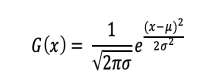

In [ ]:
#Globale Störung in Form von Gauss-Normalverteilung erzeugen
mean = 0 #Mittelwert(u)
var = 100 
sigma = var ** 0.5 #Standardabweichung(o); Doppelstern->Potenz!
gaussian = np.random.normal(mean, sigma, (row, row))
noisy_image = np.zeros(img.shape, np.float32)

if len(img.shape) == 2:
    # Graubild
    noisy_image = img + gaussian
else:
    # RGB
    noisy_image[:, :, 0] = img[:, :, 0] + gaussian
    noisy_image[:, :, 1] = img[:, :, 1] + gaussian
    noisy_image[:, :, 2] = img[:, :, 2] + gaussian

print(noisy_image)

cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

#cv2.imwrite("gaussian.jpg",noisy_image * 255)

In [ ]:
img

In [ ]:
print(img.shape)
print(gaussian.shape)
print(noisy_image.shape)

In [ ]:
gaussian

In [ ]:
noisy_image

In [ ]:
#beide bilder fourier transformieren -> Frequenzspektrum

# Original
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
freq_spektrum_original = 20*np.log(np.abs(fshift)).astype(np.uint8)

# Noisy
f_noisy = np.fft.fft2(noisy_image)
fshift_noisy = np.fft.fftshift(f_noisy)
freq_spektrum_noisyImg = 20*np.log(np.abs(fshift_noisy)).astype(np.uint8)

In [ ]:
freq_spektrum_original

In [ ]:
freq_spektrum_noisyImg

In [ ]:
#visualisieren
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap= 'gray')
ax[0].set_title('Originalbild', fontsize=20)

ax[1].imshow(freq_spektrum_original, cmap= 'gray')
ax[1].set_title('Frequenzspektrum des Originalbildes', fontsize=20)

ax[2].imshow(noisy_image, cmap = 'gray')
ax[2].set_title('Noisy Image', fontsize=20)

ax[3].imshow(freq_spektrum_noisyImg, cmap= 'gray')
ax[3].set_title('Frequenzspektrum des verrauschten Bildes', fontsize=20)

for a in ax.ravel():
    a.axis('off')
fig.tight_layout()

### 2.2: Histogramme erzeugen

In [ ]:
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
print(img.shape)
plt.title('Image')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.hist(img.ravel(),256,[0,255])
plt.title('Histogram of the original Image')

plt.subplot(2,2,3)
plt.imshow(noisy_image,cmap='gray')
plt.title('Noisy Image')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.hist(noisy_image.ravel(),256,[0,255])
plt.title('Histogram of the noisy Image')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.86,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle("Grauwertverteilungen")
plt.show()

### 2.3: Filterung im Frequenzraum

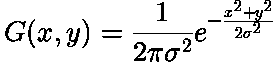

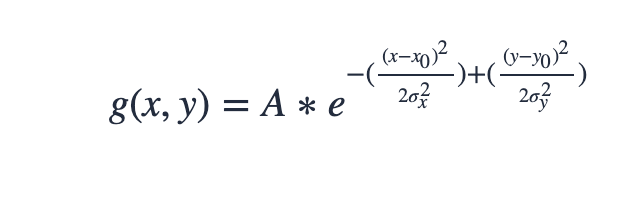

In [ ]:
# Create Gaussian Filter: Low Pass Filter
M,N = freq_spektrum_noisyImg.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 250
for x in range(M):
    for y in range(N):
        D = np.sqrt((x-M/2)**2 + (y-N/2)**2)
        H[x,y] = np.exp(-D**2/(2*D0*D0))


# fourier        
gauss = np.fft.fft2(H)
gauss_shift = np.fft.fftshift(gauss)
freq_spektrum_gauss = 20 * np.log(np.abs(gauss_shift)).astype(np.uint8)

plt.figure(figsize=(5,5))
plt.imshow(freq_spektrum_gauss, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Image Filters
Gshift = fshift_noisy * H
freq_spektrum_g = 20 * np.log(np.abs(Gshift)).astype(np.uint8)

G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

In [ ]:
#visualisieren
fig, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap= 'gray')
ax[0].set_title('Originalbild', fontsize=20)

ax[1].imshow(freq_spektrum_original, cmap= 'gray')
ax[1].set_title('Frequenzspektrum des Originalbildes', fontsize=15)

ax[2].imshow(noisy_image, cmap = 'gray')
ax[2].set_title('Noisy Image', fontsize=20)

ax[3].imshow(freq_spektrum_noisyImg, cmap= 'gray')
ax[3].set_title('Frequenzspektrum des verrauschten Bildes', fontsize=15)

ax[4].imshow(g, cmap= 'gray')
ax[4].set_title('Bild nach Low Pass Filter', fontsize=15)

ax[5].imshow(freq_spektrum_g, cmap= 'gray')
ax[5].set_title('Frequenzspektrum nach Low Pass Filter', fontsize=15)

for a in ax.ravel():
    a.axis('off')
fig.tight_layout()

In [ ]:
blur_7 = cv2.GaussianBlur(noisy_image,(7,7),0)
blur_5 = cv2.GaussianBlur(noisy_image,(5,5),0)
blur_3 = cv2.GaussianBlur(noisy_image,(3,3),0)

fig1, axes1 = plt.subplots(4, 2, figsize=(10, 10), sharex=True, sharey=True)
ax1 = axes1.ravel()

f_blur7 = np.fft.fft2(blur_7)
fshift_blur7 = np.fft.fftshift(f_blur7)
freq_spektrum_blur7 = 20*np.log(np.abs(fshift_blur7)).astype(np.uint8)

ax1[0].imshow(blur_7, cmap= 'gray')
ax1[0].set_title('Gauss 7x7', fontsize=20)

ax1[1].imshow(freq_spektrum_blur7, cmap= 'gray')
ax1[1].set_title('Frequenzspektrum Gauss 7x7', fontsize=20)

f_blur5 = np.fft.fft2(blur_5)
fshift_blur5 = np.fft.fftshift(f_blur5)
freq_spektrum_blur5 = 20*np.log(np.abs(fshift_blur5)).astype(np.uint8)

ax1[2].imshow(blur_5, cmap= 'gray')
ax1[2].set_title('Gauss 5x5', fontsize=20)

ax1[3].imshow(freq_spektrum_blur5, cmap= 'gray')
ax1[3].set_title('Frequenzspektrum Gauss 5x5', fontsize=20)

f_blur3 = np.fft.fft2(blur_3)
fshift_blur3 = np.fft.fftshift(f_blur3)
freq_spektrum_blur3 = 20*np.log(np.abs(fshift_blur3)).astype(np.uint8)

ax1[4].imshow(blur_3, cmap= 'gray')
ax1[4].set_title('Gauss 3x3', fontsize=20)

ax1[5].imshow(freq_spektrum_blur3, cmap= 'gray')
ax1[5].set_title('Frequenzspektrum Gauss 3x3', fontsize=20)

ax1[6].imshow(img, cmap= 'gray')
ax1[6].set_title('Originalbild', fontsize=20)

ax1[7].imshow(freq_spektrum_original, cmap= 'gray')
ax1[7].set_title('Frequenzspektrum des Originalbildes', fontsize=15)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.86,
                    wspace=0.4,
                    hspace=0.4)

**2.4: Erläuterung der verwendeten Methoden**
- Erläutern Sie stichpunktartig die Funktionsweise der verwendeten Funktionen zur Rauscherzeugung sowie Rauschunterdrückung.
- Erläutern Sie stichpunktartig die Funktionsweise der eingesetzten FFT sowie iFFT! 

Rauscherzeugung : Die Matrix wird gebildet, indem Zufallszahlen aus der Gaußschen Standardnormalverteilung ausgewählt werden. Ein verrauschtes Bild wird durch Summieren dieser Matrix mit dem ursprünglichen Bild erhalten.

Rauschunterdrückung : Da unser Ziel darin besteht, das Bild zu glätten, d. h. die hohen Frequenzen zu entfernen, haben wir einen Tiefpassfilter verwendet. Wir haben die Einträge des Filterkerns aus der Gauß-Funktion erstellt.

FFT : FFT teilt das Bild in Sinus und Cosinus. Anschließend berechnet er das dem Signal entsprechende Frequenzspektrum. Spektren werden in einem einzigen Frequenzspektrum synthetisiert. Niedrige Frequenzen stellen allmähliche Änderungen im Bild dar; Sie enthalten die meisten Informationen, da sie die Gesamtform oder das Muster im Bild bestimmen.

IFFT :Bei umgekehrter Verwendung der fft-Formel erhält man das Bild vor der Transformation.

### 3. Morphologische Operationen
 
**3.1 Strukturen verkleinern/vergrößern, um schmale Verbindungen zu lösen/Lücken zu schließen**

Führen Sie folgende morphologische Operationen mit dem Originalbild `leukaemie.jpg` durch:
    - Erosion
    - Dilation
    - Opening
    - Closing
 
Hierbei können Sie sowohl `Skimage`- als auch `CV2`-Bibliotheken benutzen. Stellen Sie Ihre Ergebnisse in einem 2x2-subplot dar. 


**3.2 Merkmalsextraktion**

- Welche, der in der Teilaufgabe 3.1 eingesetzten morphologischen Operationen ist am besten geeignet, falls die Anzahl der Zellen im Bild gezählt werden soll? 

- Zählen Sie ALLE Zellen in diesem Bild, nachdem sie eine "passende" morphologische Operation durchgeführt haben. Tipp: Zur Detektion von Kreisen/Ellipsen können Sie die "Hough-Transformation" anwenden.

**3.3. Bonus**
Zählen Sie NUR die lila gefärbten Leukozyten.
 

In [ ]:
original = cv2.imread(path,0)

# binarize the image
# optimal threshold value
binr = cv2.threshold(original, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# invert the image
invert = cv2.bitwise_not(binr) # größer als 0 --> 0 ; 0 -->255

kernel = np.ones((9,9),np.uint8)
erosion = cv2.erode(invert,kernel,iterations = 1)
dilation = cv2.dilate(invert,kernel,iterations = 1)
opening = cv2.morphologyEx(invert, cv2.MORPH_OPEN, kernel, iterations = 1)
closing = cv2.morphologyEx(invert, cv2.MORPH_CLOSE, kernel, iterations = 1)
#Opening : 
opening1 = cv2.dilate(erosion,kernel,iterations = 1)

#Closing : 
closing1 = cv2.erode(dilation,kernel,iterations = 1)

In [ ]:
#visualisieren
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(erosion, cmap= 'gray')
ax[0].set_title('Erosion', fontsize=20)

ax[1].imshow(dilation, cmap= 'gray')
ax[1].set_title('Dilation', fontsize=20)

ax[2].imshow(opening, cmap = 'gray')
ax[2].set_title('Opening', fontsize=20)

ax[3].imshow(closing, cmap= 'gray')
ax[3].set_title('Closing', fontsize=20)

for a in ax.ravel():
    a.axis('off')
fig.tight_layout()

In [ ]:
original = cv2.imread(path,0)

kernel = np.ones((9,9),np.uint8)
erosion = cv2.erode(original,kernel,iterations = 1)
dilation = cv2.dilate(original,kernel,iterations = 1)
opening = cv2.morphologyEx(original, cv2.MORPH_OPEN, kernel, iterations = 1)
closing = cv2.morphologyEx(original, cv2.MORPH_CLOSE, kernel, iterations = 1)
#Opening : 
opening1 = cv2.dilate(erosion,kernel,iterations = 1)

#Closing : 
closing1 = cv2.erode(dilation,kernel,iterations = 1)

In [ ]:
plt.imshow(opening1,cmap='gray')

In [ ]:
plt.imshow(closing1,cmap='gray')

In [ ]:
#visualisieren
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(erosion, cmap= 'gray')
ax[0].set_title('Erosion', fontsize=20)

ax[1].imshow(dilation, cmap= 'gray')
ax[1].set_title('Dilation', fontsize=20)

ax[2].imshow(opening, cmap = 'gray')
ax[2].set_title('Opening', fontsize=20)

ax[3].imshow(closing, cmap= 'gray')
ax[3].set_title('Closing', fontsize=20)

for a in ax.ravel():
    a.axis('off')
fig.tight_layout()

In [ ]:
img = cv2.imread(path,0)
kernel = np.ones((9,9),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations = 1)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations = 1)

img = erosion
img = cv2.medianBlur(img,5)
cimg1 = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=25,minRadius=20,maxRadius=100)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg1,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg1,(i[0],i[1]),2,(0,0,255),3)
#cv.imshow('detected circles',cimg)
#cimg = plt.imshow(cimg1)
#cv.waitKey(0)
#cv.destroyAllWindows()

img = dilation
img = cv2.medianBlur(img,5)
cimg2 = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=25,minRadius=20,maxRadius=100)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg2,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg2,(i[0],i[1]),2,(0,0,255),3)
#cv.imshow('detected circles',cimg)
#cimg = plt.imshow(cimg2)
#cv.waitKey(0)
#cv.destroyAllWindows()

img = opening
img = cv2.medianBlur(img,5)
cimg3 = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=25,minRadius=20,maxRadius=100)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg3,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg3,(i[0],i[1]),2,(0,0,255),3)
#cv.imshow('detected circles',cimg)
#cimg = plt.imshow(cimg3)
#cv.waitKey(0)
#cv.destroyAllWindows()

img = closing
img = cv2.medianBlur(img,5)
cimg4 = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=25,minRadius=20,maxRadius=100)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg4,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg4,(i[0],i[1]),2,(0,0,255),3)
#cv.imshow('detected circles',cimg)
#cimg = plt.imshow(cimg4)
#cv.waitKey(0)
#cv.destroyAllWindows()

#visualisieren
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(cimg1, cmap= 'gray')
ax[0].set_title('Erosion', fontsize=20)

ax[1].imshow(cimg2, cmap= 'gray')
ax[1].set_title('Dilation', fontsize=20)

ax[2].imshow(cimg3, cmap = 'gray')
ax[2].set_title('Opening', fontsize=20)

ax[3].imshow(cimg4, cmap= 'gray')
ax[3].set_title('Closing', fontsize=20)

for a in ax.ravel():
    a.axis('off')
fig.tight_layout()


*   Closing : Nach dem Vergleich von 4 Methoden haben wir entschieden, dass Closing die beste und konsistenteste Methode ist, um Kreise zu finden.


In [ ]:
img = closing
img = cv2.medianBlur(img,5)
cimg4 = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=60,param2=25,minRadius=20,maxRadius=100)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg4,(i[0],i[1]),i[2],(0,255,0),5)
    # draw the center of the circle
    cv2.circle(cimg4,(i[0],i[1]),2,(0,0,255),10)
#cv.imshow('detected circles',cimg)
cimg = plt.imshow(cimg4)
#cv.waitKey(0)
#cv.destroyAllWindows()

In [ ]:
from PIL import Image
im = Image.open(path) 
pix = im.load()

# Get the RGBA Value of the a pixel of an image
print(pix[300,500]) 
print(pix[1850,500])
print(pix[500,700])
print(pix[750,810])
print(pix[1300,1300])
print(pix[700,800])
print(pix[1900,400])
print(pix[1950,400])
print(pix[1937,500])
print(pix[1990,410])

In [ ]:
image = cv2.imread(path)
original = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([120, 70, 160], dtype="uint8")
upper = np.array([255, 255, 255], dtype="uint8")
mask = cv2.inRange(image, lower, upper)
plt.imshow(mask,cmap='gray')

In [ ]:
# binarize the image
binr = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# invert the image
invert = cv2.bitwise_not(binr)

kernel = np.ones((9,9),np.uint8)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations = 1)
dilation = cv2.dilate(mask,kernel,iterations = 1)
erosion = cv2.erode(mask,kernel,iterations = 1)
plt.imshow(closing,cmap='gray')

In [ ]:
plt.imshow(erosion,cmap='gray')

In [ ]:
plt.imshow(dilation,cmap='gray')

In [ ]:
image = cv2.imread(path)
# convert it back to RGB
display = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Cell_count, x_count, y_count = [], [], []

# hough transform with modified circular parameters
circles = cv2.HoughCircles(dilation, cv2.HOUGH_GRADIENT, 2, 40,param1 = 50, param2 = 50, minRadius = 30, maxRadius = 150)
 
# circle detection and labeling using hough transformation
if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
 
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
 
                cv2.circle(display, (x, y), r, (255, 0,0), 5)
                cv2.rectangle(display, (x - 2, y - 2),
                              (x + 2, y + 2), (0, 255, 255), 10)
                Cell_count.append(r)
                x_count.append(x)
                y_count.append(y)

# show the output image
plt.imshow(display,cmap ='gray')

**4. BONUSAUFGABE:** Detektieren Sie im folgenden Bild **alle Pfeile**. Treffen Sie die Entscheidung, ob die Pfeilspitze nach **rechts** oder nach **links** zeigt. 

![pfeile.png](attachment:pfeile.png)

In [ ]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_filter_arrow_image(threslold_image):
    blank_image = np.zeros_like(threslold_image)

    # dilate image to remove self-intersections error
    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    threslold_image = cv2.dilate(threslold_image, kernel_dilate, iterations=1)

    contours, hierarchy = cv2.findContours(threslold_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if hierarchy is not None:

        threshold_distnace = 1000

        for cnt in contours:
            hull = cv2.convexHull(cnt, returnPoints=False)
            defects = cv2.convexityDefects(cnt, hull)

            if defects is not None:
                for i in range(defects.shape[0]):
                    start_index, end_index, farthest_index, distance = defects[i, 0]

                    # you can add more filteration based on this start, end and far point
                    # start = tuple(cnt[start_index][0])
                    # end = tuple(cnt[end_index][0])
                    # far = tuple(cnt[farthest_index][0])

                    if distance > threshold_distnace:
                        cv2.drawContours(blank_image, [cnt], -1, 255, -1)

        return blank_image
    else:
        return None


def get_length(p1, p2):
    line_length = ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5
    return line_length


def get_max_distace_point(cnt):
    max_distance = 0
    max_points = None
    for [[x1, y1]] in cnt:
        for [[x2, y2]] in cnt:
            distance = get_length((x1, y1), (x2, y2))

            if distance > max_distance:
                max_distance = distance
                max_points = [(x1, y1), (x2, y2)]

    return max_points


def angle_beween_points(a, b):
    arrow_slope = (a[0] - b[0]) / (a[1] - b[1])
    arrow_angle = math.degrees(math.atan(arrow_slope))
    return arrow_angle


def get_arrow_info(arrow_image):
    arrow_info_image = cv2.cvtColor(arrow_image.copy(), cv2.COLOR_GRAY2BGR)
    contours, hierarchy = cv2.findContours(arrow_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    arrow_info = []
    if hierarchy is not None:

        for cnt in contours:
            # draw single arrow on blank image
            blank_image = np.zeros_like(arrow_image)
            cv2.drawContours(blank_image, [cnt], -1, 255, -1)

            point1, point2 = get_max_distace_point(cnt)

            angle = angle_beween_points(point1, point2)
            lenght = get_length(point1, point2)

            cv2.line(arrow_info_image, point1, point2, (0, 255, 255), 1)

            cv2.circle(arrow_info_image, point1, 2, (255, 0, 0), 3)
            cv2.circle(arrow_info_image, point2, 2, (255, 0, 0), 3)
            

            cv2.putText(arrow_info_image, "angle : {0:0.2f}".format(angle),
                        (point2[0] - 60,point2[1] + 20), cv2.FONT_HERSHEY_PLAIN, 0.8, (0, 255, 0), 1)
            cv2.putText(arrow_info_image, "lenght : {0:0.2f}".format(lenght),
                        (point2[0] - 60, point2[1] + 40), cv2.FONT_HERSHEY_PLAIN, 0.8, (0, 255, 0), 1)
            
            print(angle)
            print(lenght)
            print("\n")

        return arrow_info_image, arrow_info
    else:
        return None, None



image = cv2.imread("pfeile.png")
#visualisieren
fig, axes = plt.subplots(3, 1, figsize=(100, 100), sharex=True, sharey=True)
ax = axes.ravel()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
ax[0].imshow(thresh_image, cmap= 'gray')
ax[0].set_title('thresh_image', fontsize=20)

arrow_image = get_filter_arrow_image(thresh_image)
if arrow_image is not None:
    
    ax[1].imshow(arrow_image, cmap= 'gray')
    ax[1].set_title('arrow_image', fontsize=20)
    
    
    #cv2.imwrite("arrow_image.png", arrow_image)
    arrow_info_image, arrow_info = get_arrow_info(arrow_image)
    
    ax[2].imshow(arrow_info_image, cmap= 'gray')
    ax[2].set_title('arrow_image', fontsize=20)
    
    
    cv2.imwrite("arrow_info_image.png", arrow_info_image)


for a in ax.ravel():
    a.axis('off')
fig.tight_layout()   